<a href="https://colab.research.google.com/github/profandersonvanin01/ml_classificacao_vinhos/blob/main/Classifica%C3%A7%C3%A3o_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning para a Classificação de Vinhos

Base de dados: https://www.kaggle.com/datasets/dell4010/wine-dataset

O principal objetivo deste programa é criar um modelo de Machine Learning que seja capaz de classificar, de acordo com algumas propriedades, se um vinho é tinto ou branco.

In [3]:
#Importação da biblioteca Pandas
import pandas as pd

In [4]:
#Carregamento da base de dados direto do Github
arquivo = pd.read_csv('https://raw.githubusercontent.com/profandersonvanin01/ml_classificacao_vinhos/main/wine_dataset.csv')

In [ ]:
#Pré-Visualização dos 5 primeiros registros da base de dados
arquivo.head()

In [ ]:
arquivo.shape()

In [ ]:
arquivo

Repare que na última coluna (style), que é a coluna que mostra se um vinho é tinto ou branco, possui valores no formato de string.

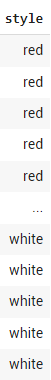

Para os modelos de Machine Learning terem um bom desempenho, é interessante transformar dados categóricos (texto) em formatos numéricos. Neste caso podemos definir que:
- vinho tinto = 0
- vinho branco = 1

In [8]:
arquivo['style'] = arquivo['style'].replace('red',0)
arquivo['style'] = arquivo['style'].replace('white',1)

In [ ]:
arquivo

Agora precisamos criar dois datasets. Um que será somente a variável alvo (a classificação do vinho) que chamaremos aqui de y, e um outro que terá as variáveis preditoras (todo o restante do dataset menos a variável alvo) que chamaremos de X.

In [10]:
y = arquivo['style']
X = arquivo.drop('style', axis = 1)

In [ ]:
y

In [ ]:
X

Agora que temos as variaveis preditoras e a alvo separadas, temos que separar os dados de ambas em dados para treinamento e dados para testes.
Para isso vamos importar uma biblioteca.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Criando os conjuntos de dados de treino e teste:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

Uma vez que já temos os dados separados. Podemos utilizar algum modelo de Machine Learning para Classificação. Vamos utilizar um modelo chamado ExtraTreesClassifier.

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
#Criação do modelo:
modelo = ExtraTreesClassifier(n_estimators = 10000,max_depth=3,verbose=1)

In [ ]:
#treino do modelo
modelo.fit(X_treino,y_treino)

In [ ]:
#mostrando resultados do treino
resultado = modelo.score(X_teste,y_teste)
print('Acurácia: ', resultado)

Uma vez que o modelo está treinado e sua acurácia atingiu um valor aceitável, vamos fazer alguns testes com valores que o modelo nunca viu.
Para facilitar, vamos escolher 3 registros.

In [ ]:
y_teste[400:403]

In [ ]:
X_teste[400:403]

In [ ]:
#Executando previsões
previsoes = modelo.predict(X_teste[400:403])
previsoes

Uma matriz de confusão é uma tabela que indica os erros e acertos do seu modelo, comparando com o resultado esperado (ou etiquetas/labels). A imagem abaixo demonstra um exemplo de uma matriz de confusão.


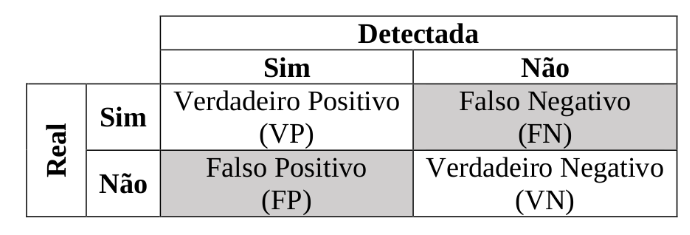

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Matriz de Confusão, sem normalização", None),
    ("Matriz de Confusão Normalizada", "true"),
]

class_names = ['tinto','branco']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        modelo,
        X_teste,
        y_teste,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Utilizando outros modelos preditores

## RandonForest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Criação do modelo:
modelo_rf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1) 

In [ ]:
#treino do modelo
modelo_rf.fit(X_treino,y_treino)

In [ ]:
#mostrando resultados do treino
resultado_rf = modelo_rf.score(X_teste,y_teste)
print('Acurácia: ', resultado_rf)

In [ ]:
#Executando previsões
previsoes_rf = modelo_rf.predict(X_teste[400:403])
previsoes_rf

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Matriz de Confusão, sem normalização", None),
    ("Matriz de Confusão Normalizada", "true"),
]

class_names = ['tinto','branco']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        modelo_rf,
        X_teste,
        y_teste,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Arvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
arvore.fit(X_treino,y_treino)
resultado_arvore = arvore.score(X_teste,y_teste)
print('Acurácia: ', resultado_arvore)

In [ ]:
#Executando previsões
previsoes_arvore = arvore.predict(X_teste[400:403])
previsoes_arvore

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Matriz de Confusão, sem normalização", None),
    ("Matriz de Confusão Normalizada", "true"),
]

class_names = ['tinto','branco']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        arvore,
        X_teste,
        y_teste,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Visualização da Árvore de Decisão

In [ ]:
from sklearn import tree
#tree.plot_tree(arvore)
#plt.show()

plt.figure(figsize=(20,10))  # customize according to the size of your tree
_ = tree.plot_tree(arvore, feature_names = X.columns, class_names=['tinto','branco'], filled=True, fontsize=12, rounded = True)
plt.show()


## Curva de Recall e Precisão

In [ ]:
previsoes_arvore2 = arvore.predict(X_teste)
previsoes_arvore2

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_teste, previsoes_arvore2)

fig, ax = plt.subplots(figsize = (20,8))
plt.plot(thresholds, precisions[:-1], 'r--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right',fontsize = 20)
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 20)
plt.show()

## Relatório de Métricas

- **Acurácia**: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
- **Precisão**: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
- **Recall/Revocação/Sensibilidade**: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;
- **F1-Score**: média harmônica entre precisão e recall.

In [ ]:
from sklearn.metrics import classification_report
# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_teste, previsoes_arvore2, digits=4))